In [ ]:
# August 2020

# @Authors: eugeniafontecha, Federicodip05


## Ejercicio de introducción a panda y análisis univariado

**Base de datos Marambio**

En el archivo marambio_2007.dat están guardadas las temperaturas pronosticadas por 5 modelos climáticos para las 12UTM en la base antártica de Marambio en un período de 2007.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
filename = 'marambio_2007.dat'

In [ ]:
data = pd.read_csv(filename,
            header=0, sep='\s+', engine='python')

In [ ]:
data.head()

,"""ukmo""","""cmam""","""gembach""","""ncep""","""ecmwf"""
"""1001""",191.8850,191.4259,191.5605,190.3499,192.1477
"""1002""",190.5867,189.4517,190.3790,188.6695,188.3967
"""1003""",190.4485,190.6399,191.0684,190.4134,189.6597
"""1004""",192.5483,191.6376,192.6831,191.4446,190.7733
"""1005""",193.0735,193.6450,193.9516,192.8147,192.4866


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, "1001" to "1231"
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   "ukmo"     89 non-null     float64
 1   "cmam"     92 non-null     float64
 2   "gembach"  92 non-null     float64
 3   "ncep"     85 non-null     float64
 4   "ecmwf"    92 non-null     float64
dtypes: float64(5)
memory usage: 4.3+ KB
None


In [ ]:
print(data.isnull().sum())

"ukmo"       3
"cmam"       0
"gembach"    0
"ncep"       7
"ecmwf"      0
dtype: int64


In [ ]:
data = data.fillna(data.mean().to_dict(),axis=0) #completamos datos faltantes con la media

* Muestre el nombre de las variables

In [ ]:
for name in data.columns:
    print(name)

"ukmo"
"cmam"
"gembach"
"ncep"
"ecmwf"


* ¿Para qué período se registraron los pronósticos?

In [ ]:
print(data.index[0])
print(data.index[-1])

"1001"
"1231"


* Calcule la temperatura promedio de ese período para cada uno de los modelos climáticos involucrados.

In [ ]:
data.mean(axis=0)

"ukmo"       220.867209
"cmam"       220.531189
"gembach"    221.452630
"ncep"       220.192254
"ecmwf"      220.379674
dtype: float64

* Calcular temperaturas máximas y mínimas para el modelos CMAM.

In [ ]:
data.loc[:,'"cmam"'].max()

238.2716

In [ ]:
data.loc[:,'"cmam"'].min()

189.4517

* Calcular medianas de las variables CMAM y UKMO.

In [ ]:
data.loc[:,['"cmam"','"ukmo"']].median(axis=0)

"cmam"    226.30450
"ukmo"    226.61465
dtype: float64

* Realizar un estudio univariado para cada modelo.

Análisis univariado:


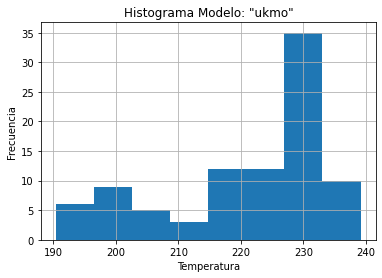

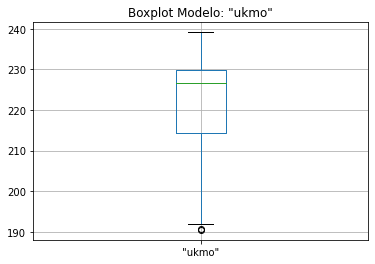

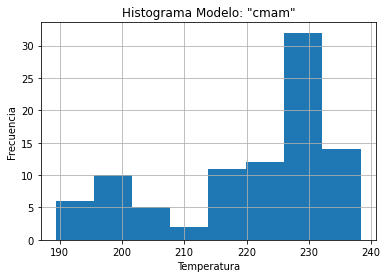

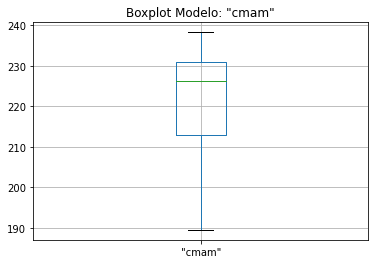

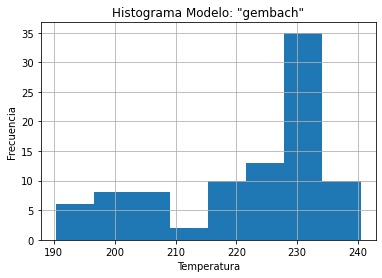

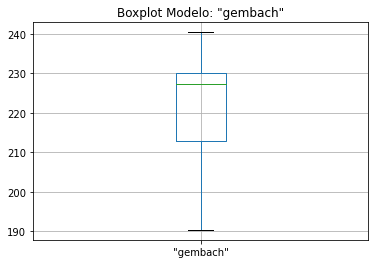

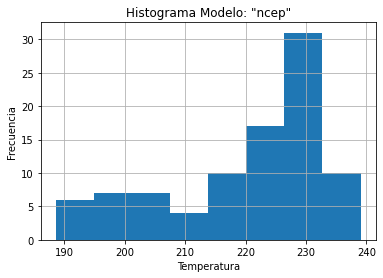

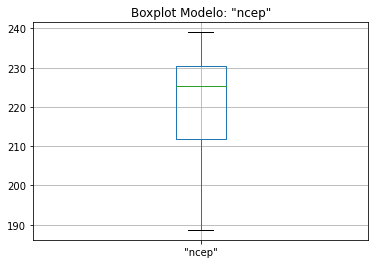

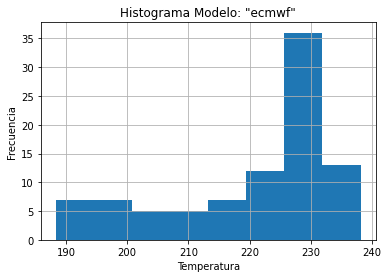

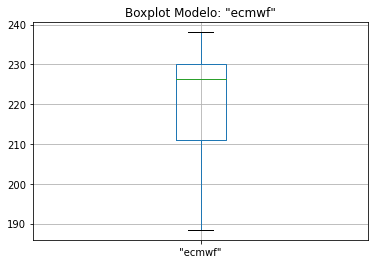

In [ ]:
print("Análisis univariado:")

for col in data.columns:
    
    temp = data.loc[:,col]    
       
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.set_title('Histograma Modelo: '+col)
    axes.set_xlabel('Temperatura')
    axes.set_ylabel('Frecuencia')
    temp.hist(bins = 8, ax = axes)
    
    fig2= plt.figure()
    axes= fig2.add_subplot(1, 1, 1)
    axes.set_title('Boxplot Modelo: '+col)
    
    temp.to_frame().boxplot(ax= axes)

* Dividir aleatoriamente el conjunto de registros en dos, dando como dato de entrada el porcentaje de elementos.

In [ ]:
def subDataSet(data, n):
    # data= Conjunto de registro
    # porcentaje de datos para entrenamiento 0 a 1
    M,N= data.shape
    np.random.shuffle(data)
    datosEntrenamiento= data[0:round(M*n)]
    datosPrueba= data[round(M*n):]
    
    return datosEntrenamiento, datosPrueba

#X = data.values
X= np.random.random((6,2))
print(X)
print("\nEntrenamiento")
Y,Z= subDataSet(X, 2/3)
print(Y)
print("\nPrueba")
print(Z)

[[0.20091574 0.77096333]
 [0.52967451 0.8663984 ]
 [0.79706486 0.37735246]
 [0.09477157 0.52432236]
 [0.93014402 0.02812803]
 [0.26574515 0.25044724]]

Entrenamiento
[[0.09477157 0.52432236]
 [0.79706486 0.37735246]
 [0.26574515 0.25044724]
 [0.20091574 0.77096333]]

Prueba
[[0.52967451 0.8663984 ]
 [0.93014402 0.02812803]]
